In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,roc_curve
from sklearn.metrics import f1_score,recall_score,precision_score,roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay


In [ ]:
#PART 1
#In local restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990.#
#The restaurant, located in a suburban shopping mall, was part of national chain and served a varied menu. 
#In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. 
#Each record includes a day and time, and taken together, they show the server’s work schedule. 
#Import Tips (Tips.csv) dataset and answer following questions:


In [10]:
df=pd.read_excel(r"C:\Users\ACER\Desktop\Midterm Exam\Python\Tips.xlsx")

In [11]:
# 1.Call our dataset and get its first 8 and last 4 rows, show number of observations. 
print('First:8')
df.head(8)

First:8


,Name,Surname,total_bill,tip,sex,smoker,day,time,size
0,Adele,Groves,16.99,1.01,Female,No,Sun,Dinner,2
1,Josh,Wilson,10.34,1.66,Male,No,Sun,Dinner,3
2,NaN,Morrison,21.01,3.50,Male,No,Sun,Dinner,3
3,Harvey,Kennedy,23.68,3.31,Male,No,Sun,Dinner,2
4,NaN,Webb,24.59,3.61,Female,No,Sun,Dinner,4
5,Lleyton,Douglas,25.29,4.71,Male,No,Sun,Dinner,4
6,NaN,Crawford,8.77,2.00,Male,No,Sun,Dinner,2
7,Alexis,Vincent,26.88,3.12,Male,No,Sun,Dinner,4


In [13]:
print('Last:4')
df.tail(4)

Last:4


,Name,Surname,total_bill,tip,sex,smoker,day,time,size
240,NaN,Teece,27.18,2.00,Female,Yes,Sat,Dinner,2
241,Scott,NaN,22.67,2.00,Male,Yes,Sat,Dinner,2
242,Ajay,Munro,17.82,1.75,Male,No,Sat,Dinner,2
243,Tereasa,Duquette,18.78,3.00,Female,No,Thur,Dinner,2


In [14]:
df.shape

(244, 9)

In [15]:
len(df)

244

In [16]:
#2.What is max, min and mean of size? Round it.   
df['size'].agg(['max', 'min', 'mean']).round()

max     6.0
min     1.0
mean    3.0
Name: size, dtype: float64

In [17]:
#3.Report number of null values for each column.                                                                     (3 points)
# a.Remove columns with null values. 
df.isnull().sum()

Name          22
Surname       14
total_bill     0
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [18]:
data_cleaned = df.dropna()


In [19]:
df.dropna().isnull().sum()

Name          0
Surname       0
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [20]:
#4.What is the most frequent day of given tips?  

freq_day = df['day'].mode().values[0]
freq_day

'Sat'

In [21]:
#5.Sort values by total bill and tip at restaurant in descending order. 
sorted_data = df.sort_values(by=['total_bill', 'tip'], ascending=False)
sorted_data


,Name,Surname,total_bill,tip,sex,smoker,day,time,size
170,Stephanie,Foley,50.81,10.00,Male,Yes,Sat,Dinner,3
212,Jack,Ross,48.33,9.00,Male,No,Sat,Dinner,4
59,John,Yates,48.27,6.73,Male,No,Sat,Dinner,4
156,Tyson,Praed,48.17,5.00,Male,No,Sun,Dinner,6
182,Bertha,Siler,45.35,3.50,Male,Yes,Sun,Dinner,3
...,...,...,...,...,...,...,...,...,...
149,Abby,Howell,7.51,2.00,Male,No,Thur,Lunch,2
172,Joel,Sinnett,7.25,5.15,Male,Yes,Sun,Dinner,2
111,Liam,Baldwin,7.25,1.00,Female,No,Sat,Dinner,1
92,Adam,Buncle,5.75,1.00,Female,Yes,Fri,Dinner,2


In [22]:
#6.Group by data by time and sex and find mean.  
# a.Which customers pay more than others?

grouped_data = df.groupby(['time', 'sex']).count()

In [23]:
grouped_data

Name  Surname  total_bill  tip  smoker  day  size
time   sex                                                      
Dinner Female    45       46          52   52      52   52    52
       Male     114      119         124  124     124  124   124
Lunch  Female    31       34          35   35      35   35    35
       Male      32       31          33   33      33   33    33

In [24]:
# a
df.sort_values(by=['total_bill'], ascending=False).head(5)

,Name,Surname,total_bill,tip,sex,smoker,day,time,size
170,Stephanie,Foley,50.81,10.00,Male,Yes,Sat,Dinner,3
212,Jack,Ross,48.33,9.00,Male,No,Sat,Dinner,4
59,John,Yates,48.27,6.73,Male,No,Sat,Dinner,4
156,Tyson,Praed,48.17,5.00,Male,No,Sun,Dinner,6
182,Bertha,Siler,45.35,3.50,Male,Yes,Sun,Dinner,3


In [25]:
# 7.Filter total bill greater than 20 and tip less than 3. 

filtered_data = df[(df['total_bill'] > 20) & (df['tip'] < 3)]
filtered_data

,Name,Surname,total_bill,tip,sex,smoker,day,time,size
21,Sofia,Cox,20.29,2.75,Female,No,Sat,Dinner,2
33,NaN,NaN,20.69,2.45,Female,No,Sat,Dinner,4
48,Andrew,Pugh,28.55,2.05,Male,No,Sun,Dinner,3
57,Beverly,Bean,26.41,1.50,Female,No,Sat,Dinner,2
68,Ethan,Bolton,20.23,2.01,Male,No,Sat,Dinner,2
102,Madison,Hunt,44.30,2.50,Female,Yes,Sat,Dinner,3
113,Molly,Iqbal,23.95,2.55,Male,No,Sun,Dinner,2
119,John,Hudson,24.08,2.92,Female,No,Thur,Lunch,4
129,Archer,Ham,22.82,2.18,Male,No,Thur,Lunch,3
131,Kyle,Doyle,20.27,2.83,Female,No,Thur,Lunch,2


In [28]:
# 8. Filter male customers with size equal to 2. 
male_customers_filtered =df[(df['sex'] == 'Male') & (df['size'] < 2)]
male_customers_filtered

,Name,Surname,total_bill,tip,sex,smoker,day,time,size
222,Charlotte,Gallagher,8.58,1.92,Male,Yes,Fri,Lunch,1


In [ ]:
#9.Find most frequent gender using “if” function.  

In [29]:
most_freq_gen = 'Male' if df['sex'].value_counts().idxmax() == 'Male' else 'Female'
most_freq_gen

'Male'

In [ ]:
#10.Find number of bills greater than daily average.       

In [30]:
daily_average = df['total_bill'].mean()
new = df[df['total_bill'] > daily_average]

In [31]:
new['total_bill'].count()

99

In [ ]:
#PART 2

#Directions: Read each question carefully and provide answers on script with your full name. send all answers in existing script you created for previous part.

#(1).Write a Python program that takes input from the user and removes the characters which have even index values. (4 points)

#(2).Suppose you are given a list of words as Wordlist. Write pyhton code that will wirte different words in paragraph by repeating words three times. For example, if Wordlist is [‘Jose’, ‘Sue’, ‘Ivan’], then your code should print. (3 points)
                 #Jose Jose Jose
                 #Sue Sue Sue
                 #Ivan Ivan Ivan



#Directions: Read Each question carefully and provide responses as script and separate report


#There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. 
#After investigation, they found that the root cause was that their customers are not investing enough for long term deposits.
#So, the bank would like to identify existing customers that have a higher chance to subscribe for a long-term deposit and focus marketing efforts on such customers. 
#The data is related to direct marketing campaigns of a Portuguese banking institution. 
#The marketing campaigns were based on phone calls. 
#Often, more than one contct to the same client was required, in order to access if the product (bank term deposit) would be subscribed (“yes”) or not (“no”) subscribed


#Poutcome: outcome of the previous marketing campaign
#1.banking.csv) and get familiarized with it. (3 points)
#2.Show distribution of age columns. Get visual to check if outliers exist in ‘age’ column or not. (3 points)
#3.Prepare data for modelling (8 points)
#4.Fit data iImport data (Portuguese_nto Logistic Regression model.. (4 points)
#5.Print detailed reports regarding accuracy metric and confusion matrix for each model. (4 points)








In [32]:
#1.banking.csv) and get familiarized with it

data = pd.read_csv(r'C:\Users\ACER\Desktop\Midterm Exam\Python\Portuguese_banking.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [45]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32950.0,40.014112,10.403636,17.0,32.0,38.0,47.0,98.0
duration,32950.0,258.127466,258.975917,0.0,103.0,180.0,319.0,4918.0
campaign,32950.0,2.560607,2.752326,1.0,1.0,2.0,3.0,56.0
pdays,32950.0,962.052413,187.951096,0.0,999.0,999.0,999.0,999.0
previous,32950.0,0.174719,0.499025,0.0,0.0,0.0,0.0,7.0


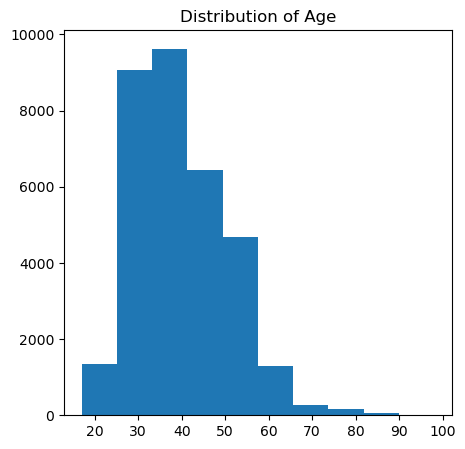

<Axes: xlabel='age'>

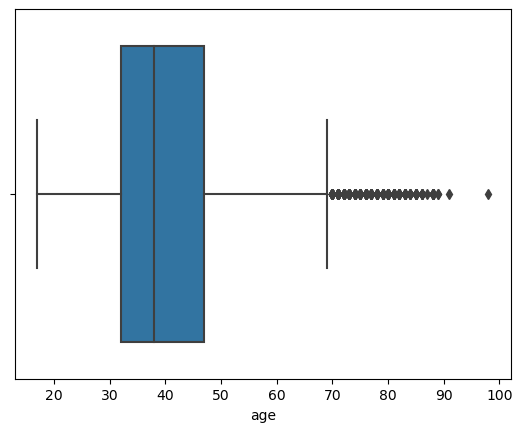

In [36]:
#2.Show distribution of age columns. Get visual to check if outliers exist in ‘age’ column or not.


plt.figure(figsize=(5, 5))
plt.hist(x=data['age'])
plt.title("Distribution of Age")
plt.show()
sns.boxplot(x=data['age'])

In [37]:
numeric_features = ['age', 'duration', 'campaign','pdays','previous']

categorical_features = ['job','marital','education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']

In [40]:
X = data.drop('y', axis=1)
y = data['y']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# (2). Write a Python program that takes input from the user and removes the characters which have odd index values.

user_input = input("Enter a string: ")

result = ''.join(char for index, char in enumerate(user_input) if index % 2 == 0)

result


Enter a string: ssss


'ss'

In [50]:
# (3). Suppose you are given a list of words as Wordlist. Write python code that will write different words in a paragraph by repeating words twice.

Wordlist = ['Jose', 'Sue', 'Ivan']

paragraph = ' '.join([word + ' ' + word for word in Wordlist])

paragraph


'Jose Jose Sue Sue Ivan Ivan'

In [43]:
X = data.drop('y', axis=1)
y = data['y']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Fit data into different models
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# 5. Print detailed reports regarding accuracy metric and confusion matrix for each model.
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_mat)
    print("Classification Report:")
    print(classification_rep)
    print("\n")

# Evaluate each model
evaluate_model(logreg_model, X_test, y_test)
evaluate_model(nb_model, X_test, y_test)
evaluate_model(knn_model, X_test, y_test)
evaluate_model(svm_model, X_test, y_test)
evaluate_model(dt_model, X_test, y_test)
evaluate_model(rf_model, X_test, y_test)

Model: LogisticRegression
Accuracy: 0.9009
Confusion Matrix:
[[5654  144]
 [ 509  283]]
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      5798
         yes       0.66      0.36      0.46       792

    accuracy                           0.90      6590
   macro avg       0.79      0.67      0.70      6590
weighted avg       0.89      0.90      0.89      6590



Model: GaussianNB
Accuracy: 0.7294
Confusion Matrix:
[[4157 1641]
 [ 142  650]]
Classification Report:
              precision    recall  f1-score   support

          no       0.97      0.72      0.82      5798
         yes       0.28      0.82      0.42       792

    accuracy                           0.73      6590
   macro avg       0.63      0.77      0.62      6590
weighted avg       0.88      0.73      0.78      6590





C:\Users\ACER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ACER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ACER\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ACER\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ACER\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

Model: KNeighborsClassifier
Accuracy: 0.8926
Confusion Matrix:
[[5659  139]
 [ 569  223]]
Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      5798
         yes       0.62      0.28      0.39       792

    accuracy                           0.89      6590
   macro avg       0.76      0.63      0.66      6590
weighted avg       0.87      0.89      0.87      6590



Model: SVC
Accuracy: 0.8997
Confusion Matrix:
[[5687  111]
 [ 550  242]]
Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95      5798
         yes       0.69      0.31      0.42       792

    accuracy                           0.90      6590
   macro avg       0.80      0.64      0.68      6590
weighted avg       0.88      0.90      0.88      6590



Model: DecisionTreeClassifier
Accuracy: 0.8707
Confusion Matrix:
[[5358  440]
 [ 412  380]]
Classification Report:
              prec